In [1]:
!pip install emoji
!pip install -q pandarallel
!sudo apt-get -o Dpkg::Options::="--force-confmiss" install --reinstall netbase
!pip install git+https://github.com/crazyfrogspb/RedditScore.git
!pip install extraction

In [2]:
from redditscore.tokenizer import CrazyTokenizer
tokenizer = CrazyTokenizer(hashtags='split', twitter_handles='realname')
tokenizer.tokenize('@realdonaldtrump please #MakeAmericaGreatAgain')
#['donald', 'j.', 'trump', 'please', 'make', 'america', 'great', 'again']

['donald', 'j.', 'trump', 'please', 'make', 'america', 'great', 'again']

In [3]:
import pandas as pd
import sys
import json
import os
import extraction
import requests
from google.colab import drive
from redditscore.tokenizer import CrazyTokenizer
import nltk
import re
import emoji
import requests
from tqdm.notebook import tqdm
import numpy as np
tqdm.pandas()
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
import warnings
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('punkt') # if necessary...
pd.set_option('display.max_colwidth', 255)
warnings.filterwarnings("ignore")
nltk.download('stopwords')
drive.mount('/content/drive')

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/COVID19 Fake News Detection in English/input/'
train_df = pd.read_csv(f"{path}Constraint_English_Train.csv")
test_df = pd.read_csv(f"{path}Constraint_English_Val.csv")
train_df = train_df.drop(columns=['id'])
train_df['target'] = train_df['label']
test_df['target'] = test_df['label']

In [ ]:
len(test_df), len(train_df)

(2140, 6420)

In [ ]:
def rename_column(df):
  for index in range(len(df)):
    if df['label'][index] == "real":
      df.at[index, 'target'] = 0
    else:
      df.at[index, 'target'] = 1
  return df
train_df = rename_column(train_df)
test_df = rename_column(test_df)

In [ ]:
train_df.head()

,tweet,label,target
0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real,0
1,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real,0
2,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake,1
3,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real,0
4,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real,0


In [ ]:
test_df.head()

,id,tweet,label,target
0,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,fake,1
1,2,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.,fake,1
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin",fake,1
3,4,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: https://t.co/qJ6hSewtgB #RNC2020 https://t.co/OFoeRZDfyY,fake,1
4,5,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇 https://t.co/jvGZlSbFjH https://t.co/PygSKXesBg,real,0


In [ ]:
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]
print(cosine_sim('politically correct woman (almost) uses pandemic as excuse not to reuse plastic bag  #coronavirus #nashville', 'politically correct woman almost uses pandemic as excuse not to reuse plastic bag | the spoof'))
#print(cosine_sim('a little bird', 'None'))
# print(cosine_sim('a little bird', 'a big dog barks'))

0.7548969126692828


In [ ]:
'''
def _store_data(load_data,link):
  store_path = f"{path}{link}.json"
  if os.path.exists(store_path) == False:
      store_data = []
      store_data.append(load_data)
      with open(store_path, 'w') as fp:
          json.dump(store_data, fp)
  else:
      with open(store_path, 'r') as fp:
          data = json.load(fp)
      data.append(load_data)
      with open(store_path, 'w') as fp:
          json.dump(data, fp)
  return

def text_replace(df,link):
  len_df = len(df)
  for index in range(len_df):
    text = df['tweet'][index]
    urls = re.findall('(https?://[^\s]+)',  df['tweet'][index])
    data = dict()
    data['index'] = index
    for url in urls:
      try:
        url = re.findall('.*[^.]', url)[0]
        html = requests.get(url).text
        extracted = extraction.Extractor().extract(html, source_url=url)
        data[url] = extracted.title
      except:
        continue
    if index % 100 == 0:
      print(index)
    _store_data(data,link)

text_replace(train_df,"train_link_store")
text_replace(test_df,"test_link_store")
'''

'\ndef _store_data(load_data,link):\n  store_path = f"{path}{link}.json"\n  if os.path.exists(store_path) == False:\n      store_data = []\n      store_data.append(load_data)\n      with open(store_path, \'w\') as fp:\n          json.dump(store_data, fp)\n  else:\n      with open(store_path, \'r\') as fp:\n          data = json.load(fp)\n      data.append(load_data)\n      with open(store_path, \'w\') as fp:\n          json.dump(data, fp)\n  return\n\ndef text_replace(df,link):\n  len_df = len(df)\n  for index in range(len_df):\n    text = df[\'tweet\'][index]\n    urls = re.findall(\'(https?://[^\\s]+)\',  df[\'tweet\'][index])\n    data = dict()\n    data[\'index\'] = index\n    for url in urls:\n      try:\n        url = re.findall(\'.*[^.]\', url)[0]\n        html = requests.get(url).text\n        extracted = extraction.Extractor().extract(html, source_url=url)\n        data[url] = extracted.title\n      except:\n        continue\n    if index % 100 == 0:\n      print(index)\n    _

### Count Number of data come from politifact website

In [ ]:
def politifact_count(link):
  path = f"/content/drive/My Drive/COVID19 Fake News Detection in English/input/{link}.json"
  with open(path, 'r') as fp:
    data = json.load(fp)
  politifact = 0
  poli_list = []
  for obj in data:
    keys = list(obj.keys())
    keys.remove('index')
    if len(keys) > 0:
      for url in keys:
        if obj[url] != None:
          text = obj[url].lower()
          text = text.split(' ')
          if 'politifact' in text:
            poli_list.append(obj['index'])
            politifact += 1
  return poli_list,len(data), politifact

train_poli_list,train_len, train_poli = politifact_count("train_link_store")
test_poli_list,test_len, test_poli = politifact_count("test_link_store")

print(f"politifact website exist in train data is = {train_poli/train_len * 100} num is {train_poli}/{train_len}")
print(f"politifact website exist in validation data is = {test_poli/test_len * 100}num is {test_poli}/{test_len}")

politifact website exist in train data is = 1.9158878504672898 num is 123/6420
politifact website exist in validation data is = 2.0560747663551404num is 44/2140


## Take only the raw tweet

In [ ]:
def without_link_tweet(text):
  raw_text = re.sub(r'(https?://[^\s]+)', '', text, flags=re.MULTILINE)
  return raw_text
  
train_df['raw_tweet'] = train_df.parallel_apply(lambda x: without_link_tweet(x['tweet']), axis=1)
test_df['raw_tweet'] = test_df.parallel_apply(lambda x: without_link_tweet(x['tweet']), axis=1)

   0.00%                                          |        0 /     3210 |      
   0.00%                                          |        0 /     3210 |      M   1.00%                                          |       32 /     3210 |      
   0.00%                                          |        0 /     3210 |      M   4.39% :                                        |      141 /     3210 |      
   1.00%                                          |       32 /     3210 |      M   4.39% :                                        |      141 /     3210 |      
  64.67% :::::::::::::::::::::::::                |     2076 /     3210 |      M 100.00% :::::::::::::::::::::::::::::::

In [ ]:
train_df['clean_tweet'] = train_df['tweet']
test_df['clean_tweet'] = test_df['tweet']

In [ ]:
def link_replace(df, link):
  path = f"/content/drive/My Drive/COVID19 Fake News Detection in English/input/{link}.json"
  with open(path, 'r') as fp:
    data = json.load(fp)
  len_df = len(df)
  for index in range(len_df):
    raw_text = re.sub(r'(https?://[^\s]+)', '', df['clean_tweet'][index], flags=re.MULTILINE)
    urls = re.findall('(https?://[^\s]+)',df['clean_tweet'][index])
    if len(urls) > 0:
      for obj in data:
        if index == obj['index']:
          for url in urls:
            try:
              location_text = obj[url]
              if location_text == None:
                df['clean_tweet'][index] = re.sub(url, '', df['clean_tweet'][index])
              elif cosine_sim(raw_text.lower(), location_text.lower()) > 0.7:
                df['clean_tweet'][index] = re.sub(url, '', df['clean_tweet'][index])
              else:
                df['clean_tweet'][index] = re.sub(url, location_text, df['clean_tweet'][index])
            except:
              pass
  return df

train_df = link_replace(train_df, "train_link_store")
test_df = link_replace(test_df,"test_link_store")

In [ ]:
train_df['target'].value_counts(), test_df['target'].value_counts()

(0    3360
 1    3060
 Name: target, dtype: int64, 0    1120
 1    1020
 Name: target, dtype: int64)

In [ ]:
train_df.head()

,tweet,label,target,raw_tweet,clean_tweet
0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,real,0,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.,The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.
1,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux,real,0,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths.,States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths.
2,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville,fake,1,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag #coronavirus #nashville,Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag #coronavirus #nashville
3,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ,real,0,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin,#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin
4,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC. https://t.co/1pYW6cWRaS,real,0,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC.,Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California or Texas: AL AR ID KS KY LA MS NV and SC.


In [ ]:
test_df.head()

,id,tweet,label,target,raw_tweet,clean_tweet
0,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,fake,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country
1,2,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.,fake,1,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin",fake,1,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin","COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin"
3,4,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: https://t.co/qJ6hSewtgB #RNC2020 https://t.co/OFoeRZDfyY,fake,1,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: #RNC2020,"Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: PolitiFact - Pence in RNC speech praises Trump’s COVID-19 ‘seamless’ response, leaves out his state feuds #RNC2020"
4,5,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇 https://t.co/jvGZlSbFjH https://t.co/PygSKXesBg,real,0,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇,"6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇 Coronavirus cases could hit 49,000 a day within weeks as PM to bring in new measures"


In [ ]:
final_hash = []
def hash_tag_count(df):
  hash_tag_words = []
  hash_tag = df.clean_tweet.str.findall(r'#.*?(?=\s|$)')
  for val in hash_tag:
    if (len(val) != 0):
      words = [word for word in val]
      hash_tag_words.extend(words)
  return hash_tag_words, Counter(hash_tag_words), len(hash_tag_words)
train_hash, hash_tag_words_train, count_train = hash_tag_count(train_df)
print(hash_tag_words_train)
print(count_train)
test_hash,hash_tag_words_test, count_test = hash_tag_count(test_df)
print(hash_tag_words_test)
print(count_test)
final_hash.extend(train_hash)
final_hash.extend(test_hash)

Counter({'#COVID19': 1176, '#coronavirus': 402, '#IndiaFightsCorona': 189, '#StaySafe': 137, '#IndiaFightsCorona:': 129, '#COVID19.': 118, '#IndiaWillWin': 116, '#COVIDー19': 94, '#CoronaVirusUpdates': 83, '#COVID': 81, '#CoronaVirusUpdates:': 77, '#COVID__19': 65, '#covid19': 64, '#CoronavirusIndia': 60, '#donaldtrump': 60, '#TakeResponsibility': 57, '#COVID19Nigeria;': 56, '#Covid_19': 46, '#COVID_19': 45, '#COVIDUpdates': 42, '#CoronaUpdates': 39, '#COVID19Nigeria': 38, '#COVIDView': 33, '#COVID19India': 30, '#CoronavirusPandemic': 28, '#COVID19;': 28, '#CoronavirusFacts': 24, '#Corona': 23, '#pandemic': 22, '#lockdown': 21, '#Coronavirus': 20, '#COVID19:': 20, '#COVID19?': 17, '#coronavirus.': 16, '#health': 15, '#factcheck': 15, '#coronavirusfacts': 14, '#KayBurley': 13, '#china': 12, '#coronavirusFacts': 12, '#StayAtHome': 12, '#CoronavirusUpdates': 11, '#HCPs:': 11, '#CoronaVirusUpdate': 11, '#coronavirusupdate': 10, '#nashville': 9, '#WearAMask': 9, '#virus': 9, '#death': 9, '#U

In [ ]:
# Word Cloud visualization
def wcolors(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    colors = ["#7e57c2", "#03a9f4", "#011ffd", "#ff9800", "#ff2079"]
    return np.random.choice(colors)
def wordcloud(df, title = None):
    # Set random seed to have reproducible results
    np.random.seed(64)
    wc = WordCloud(
        background_color="white",
        max_words=80,
        max_font_size=80,
        scale=5,
        random_state=0
    ).generate_from_frequencies(df)

    wc.recolor(color_func=wcolors)
    
    fig = plt.figure(1, figsize=(15,17))
    plt.axis('off')
    if title:
        plt.title(title, fontsize=14,y=-0.07)
        #fig.subplots_adjust(top=2.3)
    plt.imshow(wc,interpolation="bilinear")
    plt.savefig("/content/drive/My Drive/COVID19 Fake News Detection in English/test_cloud.png")#, dpi=900)
    #plt.tight_layout()
    plt.show()

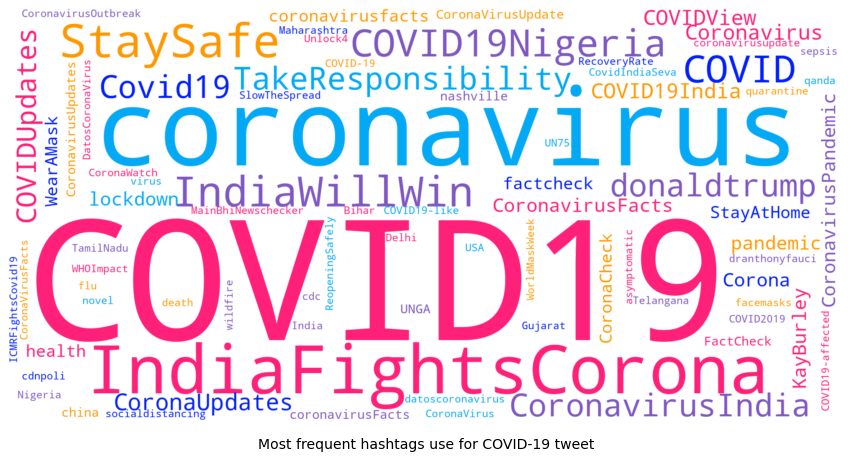

In [ ]:
#hash_tag_words_train#.keys()
freqs = pd.Series(np.concatenate([[re.sub(r"[#;?..:__,ー]","",x)] for x in final_hash])).value_counts()
freqs = freqs.drop(['onpoli','HCPs','Vermont','DYK','CoronaVirusUpdates','PMQs','covid19','NYC'])   
#freqs[:50]
wordcloud(freqs, "Most frequent hashtags use for COVID-19 tweet")

In [ ]:
emojis = []
for txt in train_df['tweet']:
  text = emoji.demojize(txt)
  text = re.findall(r'(:[!_\-\w]+:)', text)
  list_emoji = [emoji.emojize(x) for x in text]
  emojis.extend(list_emoji)

for txt in test_df['tweet']:
  text = emoji.demojize(txt)
  text = re.findall(r'(:[!_\-\w]+:)', text)
  list_emoji = [emoji.emojize(x) for x in text]
  emojis.extend(list_emoji)

In [ ]:
print(emojis)

['👇', '5️⃣', '📢', '📍', '➡️', '➡️', '👍', '➡️', '➡️', '📍', '👇', '➡️', '➡️', '🔰', '👉', '📍', '▶️', '▶️', '▶️', '👉', '😷', '👇🏿', '\U0001f9fc', '👐🏿', '💧', '📏', '📍', '▶️', '▶️', '▶️', '➡️', '➡️', '➡️', '🔰', '➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '🔰', '📢', '📍', '➡️', '➡️', '👍', '➡️', '➡️', '🇨🇳', '🌍', '🇩🇪', '▪️', '▪️', '🚓', '💣', '🏠', '✔️', '🚶\u200d♀️', '👀', '👉', '👉', '\U0001f7e2', '➡️', '◾', '◾', '◾', '👇', '👉', '👉', '\U0001f9ea', '\U0001f9ea', '➡️', '➡️', '🔰', '📍', '📌', '✅', '😷', '✅', '✅', '🎧', '◾', '◾', '◾', '📢', '✅', '📍', '📢', '📍', '➡️', '➡️', '👍', '➡️', '➡️', '📢', '😷', '🕌', '🚎', '▪️', '▪️', '▪️', '👉', '👉', '™', '📍', '📍', '👇', '👉', '👉', '➡️', '➡️', '➡️', '➡️', '🔰', '📍', '➡️', '➡️', '➡️', '➡️', '👉', '👇', '🔴', '🔴', '🔴', '📍', '🏫', '✅', '👇', '📢', '📍', '➡️', '➡️', '👍', '➡️', '➡️', '📢', '✅', '📍', '☺', '📨', '🌎', '▶️', '▶️', '➡️', '➡️', '➡️', '➡️', '✅', '✅', '✅', '👉', '▪️', '▪️', '1⃣', '1⃣', '1⃣', '🇿🇦', '👦', '\U0001f9d4', '👉', '➡️', '➡️', '➡️', '➡️', '🕤', '📺', '📱', '📍', '▶️', '▶️', '▶️', '➡️', '➡️'

In [ ]:
#emoji.demojize('\U0001f9ea ')
def replace_emoji(text):
    text = text.lower()
    text = re.sub(r"👑🦠",  " coronavirus ", text)
    text = re.sub(r"📍", " update ", text)
    text = re.sub(r"🆕", " update ", text)
    text = re.sub(r"📌", " update ", text) 
    #text = re.sub(r"✅", " verified", text)
    text = re.sub(r"📢", " update ", text)
    text = re.sub(r"📣", " update ", text)
    text = re.sub(r"🔴", " warning ", text)
    text = re.sub(r"👍", " approved ", text)
    text = re.sub(r"🔰", " driving sign ", text)
    text = re.sub(r"🙏", " thank you ", text)
    text = re.sub(r"😷", " wear a mask ", text)
    text = re.sub(r"❗", " excitement ", text)
    text = re.sub(r"🌍", " europe africa ", text)
    text = re.sub(r"🌎", " america ", text)
    text = re.sub(r"🌏", " asia austrila ", text) 
    text = re.sub(r"🌐", " globe ", text) 
    text = re.sub(r"🏫", " school ", text)
    text = re.sub(r"📺", " television ", text)
    text = re.sub(r"👏", " hand washing ", text)
    text = re.sub(r"🤔", " thinking ", text)
    text = re.sub(r"🏠", " stay at home ", text)
    text = re.sub(r"🏡", " stay at home ", text)
    text = re.sub(r"🕌", " mosque ", text)
    text = re.sub(r"📈", " increasing ", text)
    text = re.sub(r"📉", " decreasing ", text) 
    text = re.sub(r"🙌", " hand washing ", text)
    text = re.sub(r"👐", " hand washing ", text)
    text = re.sub(r"👦", " boy ", text)
    text = re.sub(r"❌", " not ", text)
    text = re.sub(r"🙄", " rolling eye ", text)
    text = re.sub(r"📏", " keep distance ", text)
    text = re.sub(r"👥", " social distance ", text)
    text = re.sub(r"💉", " vaccination ", text)
    text = re.sub(r"\U0001f9ea", "vaccination ", text)
    text = re.sub(r"🧪", "vaccination ", text) 
    text = re.sub(r"💊", " pill ", text)
    text = re.sub(r"🗣️", " speak ", text) 
    text = re.sub(r"🚍", " transportation ", text)
    text = re.sub(r"🚌", " transportation ", text)
    text = re.sub(r"💺", " seat ", text) 
    text = re.sub(r"🐍", " snake ", text)
    text = re.sub(r"💊", " mike ", text)
    text = re.sub(r"🏥", " hospital ", text) 
    text = re.sub(r"🚑", " ambulance ", text)  
    text = re.sub(r"🚨", " emergency ", text)
    text = re.sub(r"🏪", " convenience store ", text)
    text = re.sub(r"😞", " disappointed ", text) 
    text = re.sub(r"🎉", " party popper ",text )
    text = re.sub(r"📰", " newspaper ",text )
    text = re.sub(r"🤱", " breast feeding ",text)
    text = re.sub(r"👀", " astonished ",text)
    text = re.sub(r"🧤", " gloves ",text)
    text = re.sub(r"🚶🏿", " social distance ",text)
    text = re.sub(r"🚥", " traffic light ",text)
    text = re.sub(r"↗", " up right ",text)
    text = re.sub(r"⚕", " medicine and health care services ",text)
    
    # text = re.sub(r"🙂", " smile",text)
    # text = re.sub(r"😁", " smile",text)
    # text = re.sub(r"😠", " angry",text)
    # text = re.sub(r"😭", " crying",text)
    # text = re.sub(r"😧", " worry",text) #anguished
    # text = re.sub(r"😢", " crying",text)
    # text = re.sub(r"😣", " helplessness",text)#persevering_face
    # text = re.sub(r"😞", " disappointed",text)
    # text = re.sub(r"😖", " sad",text)
    # text = re.sub(r"😬", " disapproval",text)
    # text = re.sub(r"🤣", " laughing",text)
    # text = re.sub(r"😐", " neutral",text)
    
    text = re.sub(r"↔️", " keep distance ", text)
    text = re.sub(r"🦠", " virus ", text)
    text = re.sub(r"💧", " droplet ", text)
    text = re.sub(r"💦", " droplet ", text)
    text = re.sub(r"🧴", " sanitizer ", text)
    text = re.sub(r"🧼", " hand wash ", text)
    text = re.sub(r"🚫", " not ", text)
    text = re.sub(r"🚰", " hand wash ", text)
    text = re.sub(r"🤝", " not handshake ", text)
    text = re.sub(r"🧑‍🤝‍🧑", " not close contact ", text)
    text = re.sub(r"🧫", " test for covid-19 ", text)
    text = re.sub(r"🧪", " test for covid-19 ", text)
    text = re.sub(r"🌡️", " body temperature measured ", text)
    text = re.sub(r"🔬", " test for covid-19 ", text)
    text = re.sub(r"📝", " contact tracing ", text)
    text = re.sub(r"🧑‍⚕️", " health worker ", text)
    text = re.sub(r"🐦", " hand wash ", text)
    text = re.sub(r"🛡", " shielding required ", text)
    text = re.sub(r"♿️", " accessibility requirements ", text)
    text = re.sub(r"🆘", " emergency help required ", text)    

    with open('/content/drive/My Drive/COVID19 Fake News Detection in English/country_emoji.json') as json_file:
      data = json.load(json_file)
    for val in data:
      name = f" {val['name']} "
      text = re.sub(val['emoji'], name, text)
    text = text.strip(' ')
    return text
def digit_remove(text):
  text = re.sub("\d+", " ", text)
  #text = text.replace('$$', "19")
  return text

In [ ]:
def preprocess(text):
  tok_words = []
  text = text.lower()
  text = text.split(' ')
  for tok_word in text: 
    if "#covid" in tok_word:
      sub_split_pos = tok_word.find('19')
      if sub_split_pos == -1: #coviduk
        if tok_word.strip() == "#covid":
          tok_words.append("covid-19")
        else:
          tok_words.append("covid-19")
          tok_words.append(tok_word[6:])

      elif sub_split_pos+2 == len(tok_word):
        tok_words.append("covid-19")
        #tok_words.append(tok_word.replace("#",""))

      else: #COVID-19Uganda
        fst = tok_word[:sub_split_pos+2]
        tok_words.append("covid-19")
        #tok_words.append(fst.replace("#",""))
        sec = tok_word[sub_split_pos+2:]
        tok_words.append(sec)
    else:
      tok_words.append(tok_word)

  text = ' '.join(tok_words)
  text = text.replace("19","$$")
  text = digit_remove(text)
  text = replace_emoji(text)
  text = text.strip()
  text = text.replace("$$","19")
  text = text.replace("politifact","")
  text = ' '.join(text.split()) 
  return text

In [ ]:
t = "PolitiFact 9/11 out🆘 of 🆘 13 people🇯🇵 🇳🇴 🇱🇦 🆘 #COVID--19Updates 🤣 #COVID19 25th Sep 2569 #CovidUK #COVID19Pandemic #covid19ireland #COVID19NZ #covid__19 #covid--19 #covid 19 #COVID-19Nigeria #COVID-19"
t = preprocess(t) 
t

'/ out emergency help required of emergency help required people japan norway laos emergency help required covid-19 updates 🤣 covid-19 th sep covid-19 uk covid-19 pandemic covid-19 ireland covid-19 nz covid-19 covid-19 covid-19 19 covid-19 nigeria covid-19'

In [ ]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda s : preprocess(s))
test_df['clean_tweet'] = test_df['clean_tweet'].apply(lambda s : preprocess(s))

In [ ]:
test_df.head()

,id,tweet,label,target,raw_tweet,clean_tweet
0,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,fake,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,chinese converting to islam after realising that no muslim was affected by #coronavirus #covd19 in the country
1,2,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.,fake,1,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.,out of people (from the diamond princess cruise ship) who had intially tested negative in tests in japan were later confirmed to be positive in the united states.
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin",fake,1,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin","covid-19 is caused by a bacterium, not virus and can be treated with aspirin"
3,4,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: https://t.co/qJ6hSewtgB #RNC2020 https://t.co/OFoeRZDfyY,fake,1,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: #RNC2020,"mike pence in rnc speech praises donald trump’s covid-19 “seamless” partnership with governors and leaves out the president's state feuds: - pence in rnc speech praises trump’s covid-19 ‘seamless’ response, leaves out his state feuds #rnc"
4,5,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇 https://t.co/jvGZlSbFjH https://t.co/PygSKXesBg,real,0,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇,"/ sky's @edconwaysky explains the latest covid-19 data and government announcement. get more on the #coronavirus data here👇 coronavirus cases could hit , a day within weeks as pm to bring in new measures"


In [ ]:
tokenizer = CrazyTokenizer(
    keepcaps=True,
    #ignore_stopwords='english',
    #stem = 'stem',
    remove_punct=True, 
    remove_breaks=True,
    decontract=True,
    hashtags='split',
    twitter_handles='realname',
    urls='title',
    normalize=4
)

def concat_tok(text):
  text = tokenizer.tokenize(text)
  text = ' '.join(text)
  text = text.strip()
  return text

In [ ]:
train_df['clean_tweet'] = train_df.parallel_apply(lambda x: concat_tok(x['clean_tweet']), axis=1)

   0.00%                                          |        0 /     3210 |      
   0.00%                                          |        0 /     3210 |      M   0.00%                                          |        0 /     3210 |      
   1.00%                                          |       32 /     3210 |      M   1.00%                                          |       32 /     3210 |      
   1.03%                                          |       33 /     3210 |      M   1.06%                                          |       34 /     3210 |      
   1.03%                                          |       33 /     3210 |      M   1.06%                                

In [ ]:
test_df['clean_tweet'] = test_df.parallel_apply(lambda x: concat_tok(x['clean_tweet']), axis=1)

   0.00%                                          |        0 /     1070 |      
   0.00%                                          |        0 /     1070 |      M   0.93%                                          |       10 /     1070 |      
   0.00%                                          |        0 /     1070 |      M   1.03%                                          |       11 /     1070 |      
   0.93%                                          |       10 /     1070 |      M   1.40%                                          |       15 /     1070 |      
   1.03%                                          |       11 /     1070 |      M   1.59%                                

In [ ]:
# apply second time becasue some hashtag can not splitable in firsttime.
train_df['clean_tweet'] = train_df.parallel_apply(lambda x: concat_tok(x['clean_tweet']), axis=1)
test_df['clean_tweet'] = test_df.parallel_apply(lambda x: concat_tok(x['clean_tweet']), axis=1)

   0.00%                                          |        0 /     3210 |      
   0.00%                                          |        0 /     3210 |      M   0.00%                                          |        0 /     3210 |      
   1.00%                                          |       32 /     3210 |      M   1.00%                                          |       32 /     3210 |      
   2.40%                                          |       77 /     3210 |      M   1.84%                                          |       59 /     3210 |      
   6.26% ::                                       |      201 /     3210 |      M   5.95% ::                             

In [ ]:
def preprocess_again(text):
  text = re.sub(r"[^A-Za-z0-9|-]", " ", text)  
  text = ' '.join(text.split()) 
  return text

train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda s : preprocess_again(s))
test_df['clean_tweet'] = test_df['clean_tweet'].apply(lambda s : preprocess_again(s))

In [ ]:
path = "/content/drive/My Drive/COVID19 Fake News Detection in English/input/"
train_df.to_csv(f'{path}train_data.csv',index=False)
test_df.to_csv(f'{path}val_data.csv',index=False)

## Check data after cleaning

In [4]:
path = "/content/drive/My Drive/COVID19 Fake News Detection in English/input/"
train_df = pd.read_csv(f"{path}train_data.csv")
test_df = pd.read_csv(f"{path}val_data.csv")

In [5]:
test_df.head()

,id,tweet,label,target,raw_tweet,clean_tweet
0,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,fake,1,Chinese converting to Islam after realising that no muslim was affected by #Coronavirus #COVD19 in the country,chinese converting to islam after realising that no muslim was affected by coronavirus covd 1 9 in the country
1,2,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.,fake,1,11 out of 13 people (from the Diamond Princess Cruise ship) who had intially tested negative in tests in Japan were later confirmed to be positive in the United States.,out of people from the diamond princess cruise ship who had intially tested negative in tests in japan were later confirmed to be positive in the united states
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin",fake,1,"COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin",covid-19 is caused by a bacterium not virus and can be treated with aspirin
3,4,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: https://t.co/qJ6hSewtgB #RNC2020 https://t.co/OFoeRZDfyY,fake,1,Mike Pence in RNC speech praises Donald Trump’s COVID-19 “seamless” partnership with governors and leaves out the president's state feuds: #RNC2020,mike pence in rnc speech praises donald trump is covid-19 seamless partnership with governors and leaves out the president is state feuds pence in rnc speech praises trump is covid-19 seamless response leaves out his state feuds rnc
4,5,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇 https://t.co/jvGZlSbFjH https://t.co/PygSKXesBg,real,0,6/10 Sky's @EdConwaySky explains the latest #COVID19 data and government announcement. Get more on the #coronavirus data here👇,sky is explains the latest covid-19 data and government announcement get more on the coronavirus data here coronavirus cases could hit a day within weeks as pm to bring in new measures


In [ ]:
train_clean_data = train_df['clean_tweet']
test_clean_data =  test_df['clean_tweet']
train_clean_data.to_csv(f'{path}train_clean_text.csv', index=False)
test_clean_data.to_csv(f'{path}test_clean_text.csv', index=False)

In [ ]:
print(train_df.isnull().sum())

test_df[test_df.isnull().any(axis=1)]

tweet          0
label          0
target         0
raw_tweet      0
clean_tweet    0
dtype: int64


,id,tweet,label,target,raw_tweet,clean_tweet


In [ ]:
from collections import Counter
def hash_tag_count(df):
  hash_tag_words = []
  hash_tag = df.clean_tweet.str.findall(r'#.*?(?=\s|$)')
  for val in hash_tag:
    if (len(val) != 0):
      words = [word for word in val]
      hash_tag_words.extend(words)
  return Counter(hash_tag_words), len(hash_tag_words)
hash_tag_words, count = hash_tag_count(train_df)
print(hash_tag_words)
print(count)
hash_tag_words, count = hash_tag_count(test_df)
print(hash_tag_words)
print(count)

Counter()
0
Counter()
0


In [ ]:

emojis = []
for txt in train_df['clean_tweet']:
  text = emoji.demojize(txt)
  text = re.findall(r'(:[!_\-\w]+:)', text)
  list_emoji = [emoji.emojize(x) for x in text]
  emojis.extend(list_emoji)

for txt in test_df['clean_tweet']:
  try:
    text = emoji.demojize(txt)
    text = re.findall(r'(:[!_\-\w]+:)', text)
    list_emoji = [emoji.emojize(x) for x in text]
    emojis.extend(list_emoji)
  except:
    continue
print(Counter(emojis))

Counter()


In [ ]:
text = "COVID-19 Is Caused By A Bacterium, Not Virus And Can Be Treated With Aspirin"
text = re.sub(r"[^A-Za-z0-9|-]", " ", text)  
text = ' '.join(text.split()) 
text

'COVID-19 Is Caused By A Bacterium Not Virus And Can Be Treated With Aspirin'